In [1]:
# Import libraries
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
# Import data
df = pd.read_csv('CC GENERAL.csv', delimiter = ',')

#### This credit card data 'CC GENERAL' was obtain from https://www.kaggle.com 

In [3]:
# Remove NAN
samples_before = df.shape[0]
df = df.dropna()
print('Remove %s sample' % (samples_before - df.shape[0]))

# Size of the data set after removing NANA
print(df.shape)

Remove 314 sample
(8636, 18)


In [4]:
# Explore the data set and feature names
df.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.00,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.00,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.00,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.00,0,3,11000.0,1164.770591,100.302262,0.000000,12
10,C10011,1293.124939,1.000000,920.12,0.00,920.12,0.000000,1.000000,0.000000,1.000000,0.00,0,12,1200.0,1083.301007,2172.697765,0.000000,12


 ### Since this is a unsupervised learning problem, no predication will be made, only X feature names will be used

In [5]:
# Remove CUST_ID
X = df.iloc[:,1:]

In [6]:
X

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


### Find the optimum number of clusters

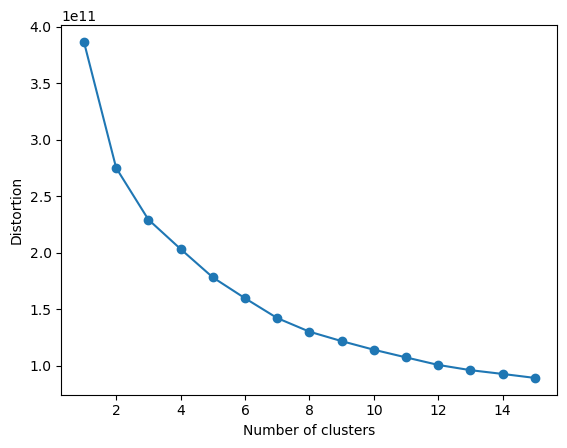

In [7]:
# Elbow method will be used to find the number of clusters
distortions = []
for i in range(1,16):
    km = KMeans(n_clusters = i,init= 'k-means++',n_init=10,max_iter = 300, tol = 1e-04,random_state= 0)
    
    km.fit(X)
    distortions.append(km.inertia_)
    
# Plot distortions
plt.plot(range(1,16), distortions, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

### The Elbow method can sometimes be difficult be estimate the number of clusters.
### The  inertia seems to slow down at 2.
### We can also use the silhouette score method the estimate the number of clusters.

/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

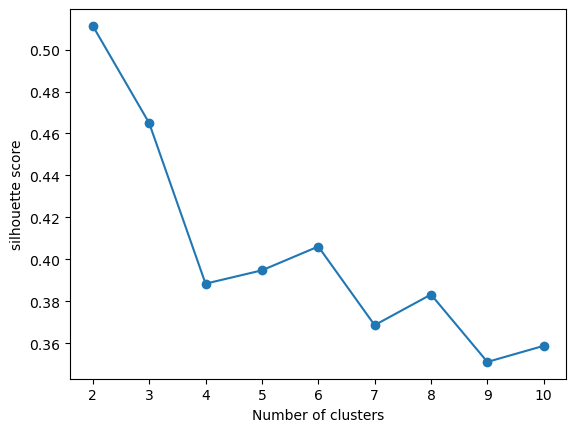

In [10]:
# Silhouette Method

sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(X)
    labels = kmeans.labels_
    sil.append(silhouette_score(X, labels, metric= 'euclidean'))
    
# Plot
plt.plot(range(2, kmax+1), sil, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('silhouette score')
plt.show()

### The highest line on the plot graph will be the number of cluster, which is = 2 clusters

In [11]:
# Fit data into K-means clusters
km = KMeans(n_clusters = 2,init= 'k-means++',n_init=10,max_iter = 300, tol = 1e-04,random_state= 0)
km.fit(X)

KMeans(n_clusters=2, n_init=10, random_state=0)

In [12]:
# See the first few cluster allocations
print('First few cluster labels:',km.labels_[:65])

print('Cluster 0 size: %s \nCluster 1 size: %s' % (len(km.labels_)- km.labels_.sum(), km.labels_.sum()))

First few cluster labels: [1 0 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 0 1 0 1 0 1 0 1 0 1
 0 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0]
Cluster 0 size: 1839 
Cluster 1 size: 6797


In [13]:
# Set up a dataframe with cluster alloaction

Xnew = X.copy()
Xnew['CLUSTERS']= km.labels_
Xnew.sample(8, random_state=0)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTERS
613,5380.796813,1.000000,1710.24,817.32,892.92,2292.800636,1.000000,0.416667,1.000000,0.250000,6,43,6000.0,1572.990843,3215.771919,0.00,12,0
5632,1372.443049,1.000000,0.00,0.00,0.00,3895.022384,0.000000,0.000000,0.000000,0.333333,7,0,2500.0,2697.221300,679.634933,0.00,12,1
4983,2133.901379,1.000000,303.03,9.03,294.00,0.000000,1.000000,0.083333,1.000000,0.000000,0,13,3000.0,1512.770602,615.208288,0.00,12,1
7966,933.058080,1.000000,0.00,0.00,0.00,634.617283,0.000000,0.000000,0.000000,0.416667,10,0,1000.0,827.275832,299.528450,0.00,12,1
6427,23.120939,0.545455,282.59,0.00,282.59,0.000000,0.583333,0.000000,0.500000,0.000000,0,7,5000.0,128.885146,69.378497,0.25,12,1
211,3670.505960,1.000000,965.50,876.13,89.37,0.000000,0.500000,0.500000,0.083333,0.000000,0,9,7500.0,1034.932404,941.496383,0.00,12,1
7085,969.139152,1.000000,269.34,78.00,191.34,78.312660,0.666667,0.083333,0.583333,0.083333,1,11,2000.0,641.186755,383.080045,0.00,12,1
2641,1510.111755,1.000000,1895.25,541.57,1353.68,0.000000,1.000000,0.166667,0.750000,0.000000,0,23,9000.0,1711.895180,313.131912,0.00,12,0


### Analyse the clusters

In [14]:
# Plotting the relevant features for cluster analyses
var = ['BALANCE','PURCHASES','CREDIT_LIMIT','PAYMENTS']

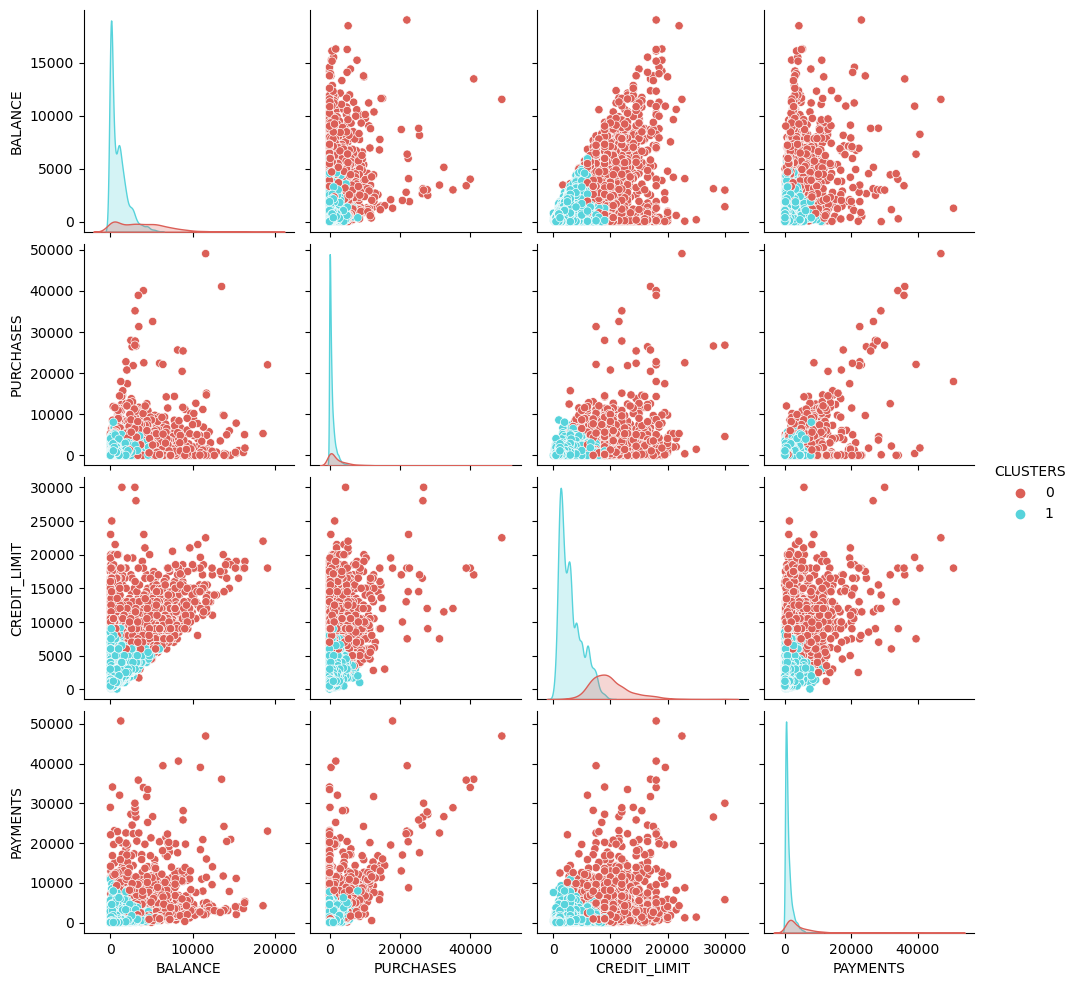

In [19]:
# Plot using seaborn
sns.pairplot(Xnew,vars=var,hue='CLUSTERS',palette=sns.color_palette('hls',2))

### The conlusion from the cluster analyses, the plot shows lot of red dots, which indicates that from the plot the is high payments, high credit limits ans low purchases andthe problem we can see from the clusters the is a lot of outliers.

### So we going to transform the data so to reduce the outliers.

In [20]:
# Transform the data using square root
X = np.sqrt(df.iloc[:,1:])

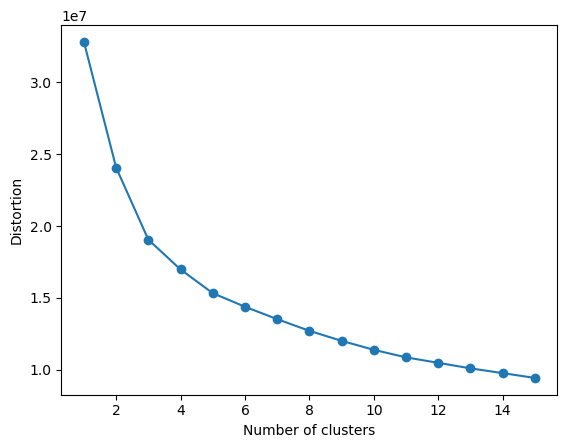

In [21]:
# Elbow method
distortions = []
for i in range(1,16):
    km = KMeans(n_clusters = i,init= 'k-means++',n_init=10,max_iter = 300, tol = 1e-04,random_state= 0)
    
    km.fit(X)
    distortions.append(km.inertia_)
    
# Plot distortions
plt.plot(range(1,16), distortions, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

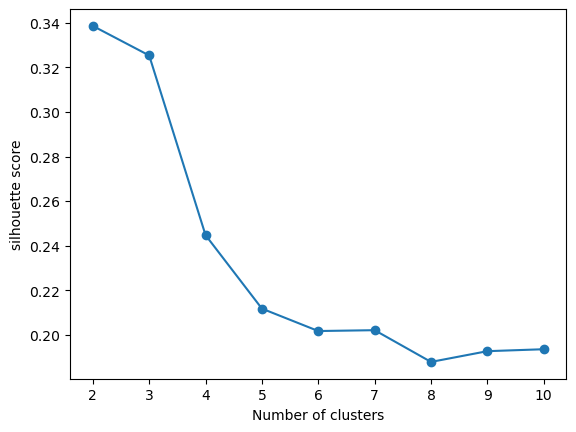

In [22]:
# Silhouette Method

sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(X)
    labels = kmeans.labels_
    sil.append(silhouette_score(X, labels, metric= 'euclidean'))
    
# Plot
plt.plot(range(2, kmax+1), sil, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('silhouette score')
plt.show()

In [23]:
# Fit data into K-means clusters
km = KMeans(n_clusters = 2,init= 'k-means++',n_init=10,max_iter = 300, tol = 1e-04,random_state= 0)
km.fit(X)

KMeans(n_clusters=2, n_init=10, random_state=0)

In [24]:
# See the first few cluster allocations
print('First few cluster labels:',km.labels_[:65])

print('Cluster 0 size: %s \nCluster 1 size: %s' % (len(km.labels_)- km.labels_.sum(), km.labels_.sum()))

First few cluster labels: [1 0 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 0 1 0 1 0 0 1 1 1 0 1 0 1 0 1 0 1 0 0
 0 0 1 1 1 1 0 1 1 1 0 1 1 0 0 1 0 1 1 0 0 1 1 1 0 1 0 0]
Cluster 0 size: 2535 
Cluster 1 size: 6101


We can see from the second cluster allocation, the is a different in the cluster size

In [25]:
Xnew = X.copy()
Xnew['CLUSTERS']= km.labels_
Xnew.sample(8, random_state=0)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTERS
613,73.353915,1.000000,41.355048,28.588809,29.881767,47.883198,1.000000,0.645497,1.000000,0.500000,2.449490,6.557439,77.459667,39.660949,56.707777,0.0,3.464102,0
5632,37.046498,1.000000,0.000000,0.000000,0.000000,62.410114,0.000000,0.000000,0.000000,0.577350,2.645751,0.000000,50.000000,51.934779,26.069809,0.0,3.464102,1
4983,46.194170,1.000000,17.407757,3.004996,17.146428,0.000000,1.000000,0.288675,1.000000,0.000000,0.000000,3.605551,54.772256,38.894352,24.803393,0.0,3.464102,1
7966,30.545999,1.000000,0.000000,0.000000,0.000000,25.191611,0.000000,0.000000,0.000000,0.645497,3.162278,0.000000,31.622777,28.762403,17.306890,0.0,3.464102,1
6427,4.808424,0.738549,16.810413,0.000000,16.810413,0.000000,0.763762,0.000000,0.707107,0.000000,0.000000,2.645751,70.710678,11.352759,8.329376,0.5,3.464102,1
211,60.584701,1.000000,31.072496,29.599493,9.453571,0.000000,0.707107,0.707107,0.288675,0.000000,0.000000,3.000000,86.602540,32.170365,30.683813,0.0,3.464102,0
7085,31.131000,1.000000,16.411581,8.831761,13.832570,8.849444,0.816497,0.288675,0.763762,0.288675,1.000000,3.316625,44.721360,25.321666,19.572431,0.0,3.464102,1
2641,38.860156,1.000000,43.534469,23.271657,36.792391,0.000000,1.000000,0.408249,0.866025,0.000000,0.000000,4.795832,94.868330,41.375055,17.695534,0.0,3.464102,0


In [26]:
# Plotting the relevant features for cluster analyses
var = ['BALANCE','PURCHASES','CREDIT_LIMIT','PAYMENTS']

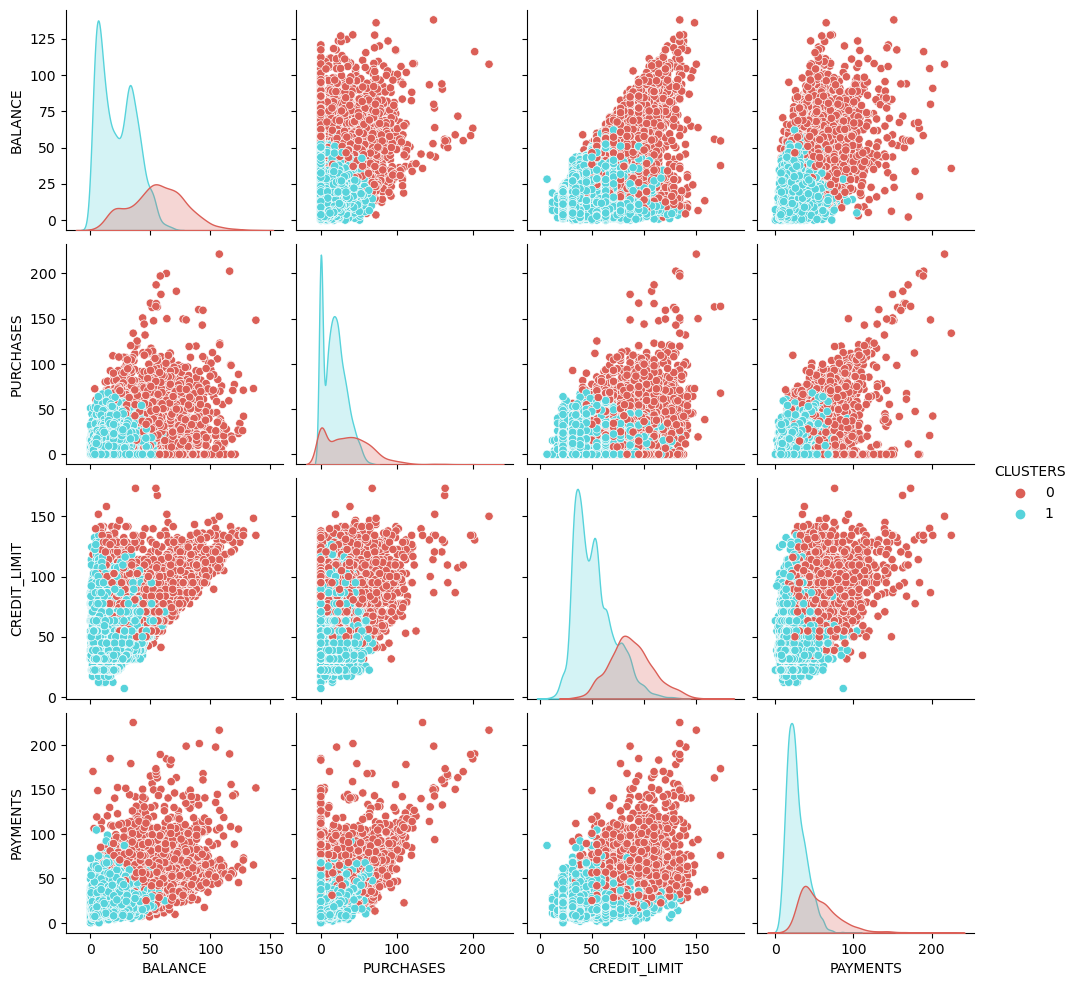

In [27]:
# Plot using seaborn
sns.pairplot(Xnew,vars=var,hue='CLUSTERS',palette=sns.color_palette('hls',2))

### From the transforming the data, we can see that the plots are more arounded up and we have less outliers